In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset('iris')  # use seaborn to load the iris data

In [3]:
df.species = pd.Categorical(df.species)
df.species.dtype

CategoricalDtype(categories=['setosa', 'versicolor', 'virginica'], ordered=False)

In [4]:
df['num_label'] = df.species.cat.codes

# Based on Matplotlib 

## Matplotlib  ᗒ ͟ʖᗕ

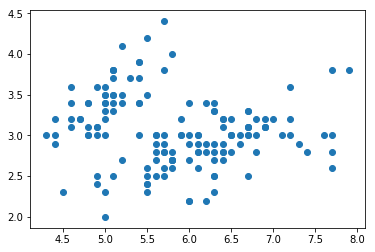

In [5]:
plt.scatter(df.sepal_length, df.sepal_width)

add some color

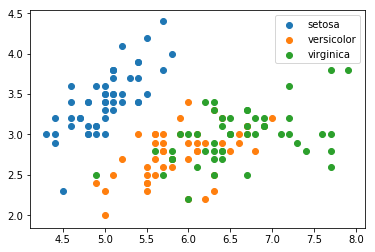

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
for sp in df.species.unique():
    x = df[df.species==sp]['sepal_length']
    y = df[df.species==sp]['sepal_width']
    ax.scatter(x, y, label=sp)
ax.legend()

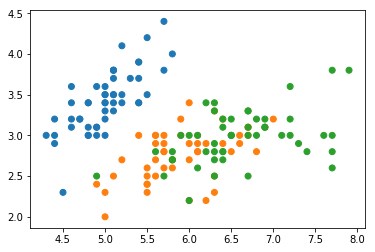

In [7]:
pallette = dict(zip(df.species.unique(), ['C0', 'C1', 'C2']))
colors = df.species.map(pallette)
plt.scatter(df.sepal_length, df.sepal_width, c=colors)

### add size

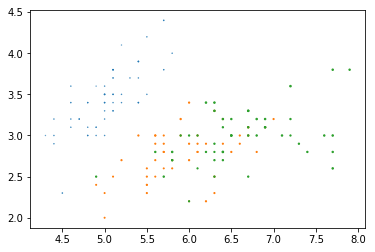

In [8]:
plt.scatter(df.sepal_length, df.sepal_width, c=colors, s=df.petal_width)

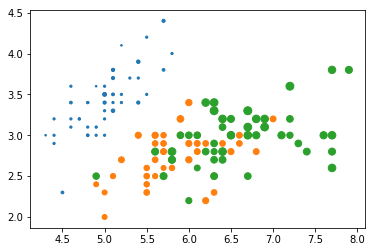

In [9]:
# multiply to get the desired effect
plt.scatter(df.sepal_length, df.sepal_width, c=colors, s=df.petal_width*25)

## Pandas  ಠ_ಠ

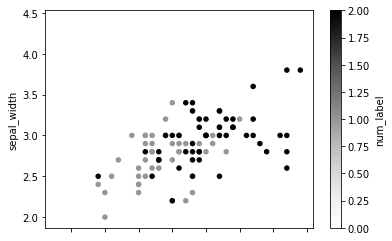

In [10]:
df.plot.scatter('sepal_length', 'sepal_width', c='num_label')
# pandas doesn't get that this is a category

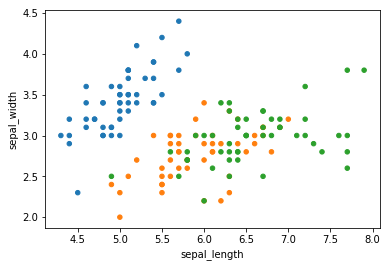

In [11]:
# using the previously defined color list
df.plot.scatter('sepal_length', 'sepal_width', c=colors) 

### size

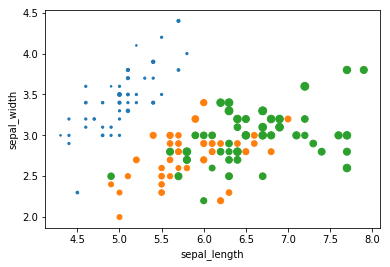

In [12]:
# using the previously defined color list
df.plot.scatter('sepal_length', 'sepal_width',s=df.petal_width*25, c=colors) 

## Seaborn  (∩ ͡° ͜ʖ ͡°)⊃━☆ﾟ.*

High level powerful statistical charts build on matplotlib!

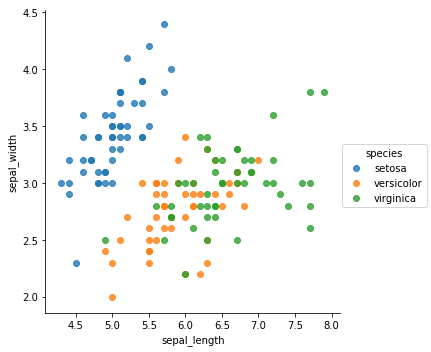

In [13]:
sns.lmplot('sepal_length', 'sepal_width', data=df, hue='species', fit_reg=False)

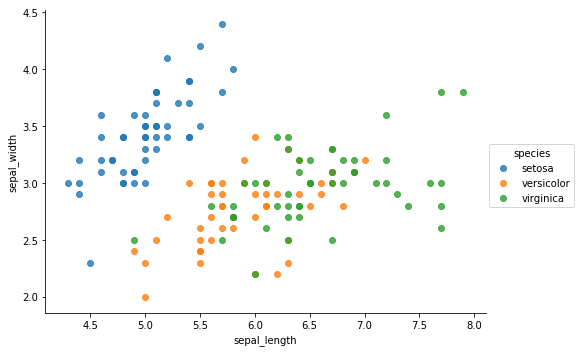

In [14]:
sns.lmplot('sepal_length', 'sepal_width', data=df, hue='species', fit_reg=False, aspect=1.4)

other workarounds to make scatter plots with seaborn:

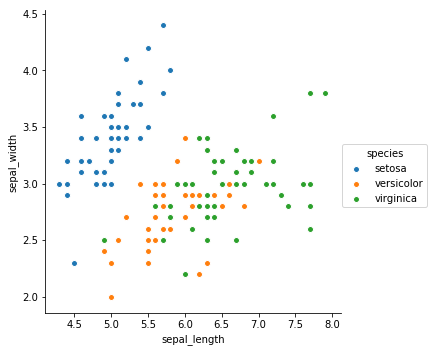

In [15]:
sns.pairplot(df, x_vars='sepal_length', y_vars='sepal_width',hue='species', size=5)

this magic comes from an even magical plot:

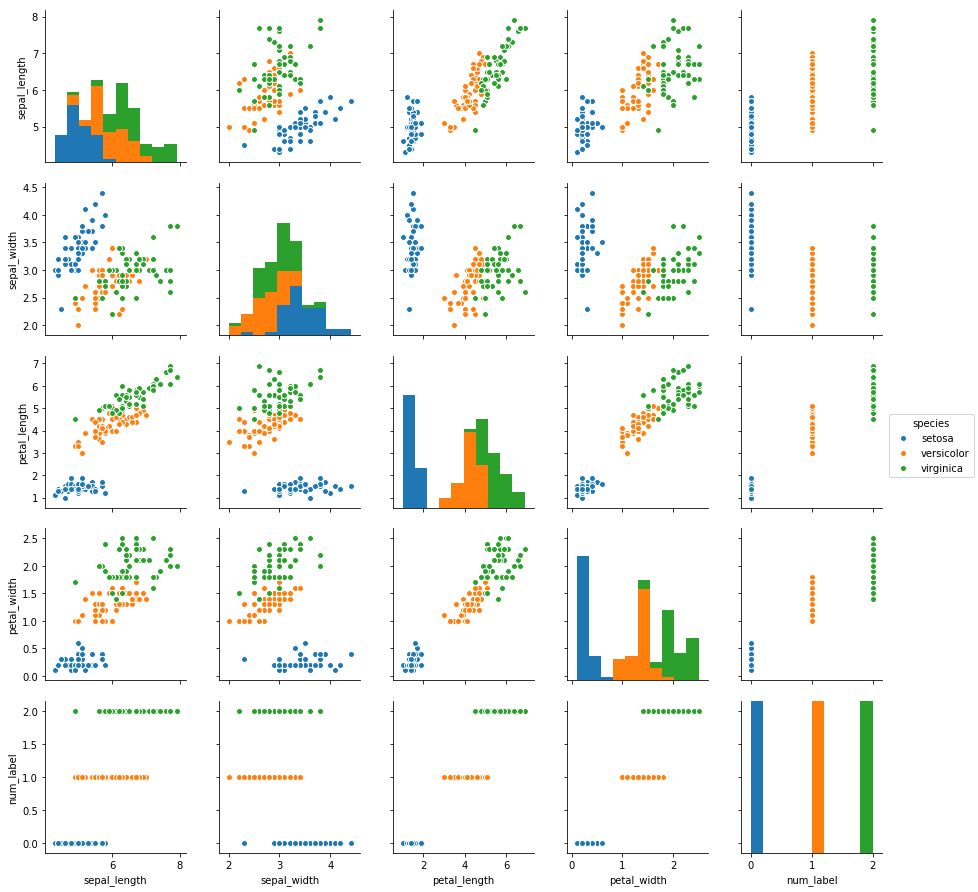

In [16]:
sns.pairplot(df, hue='species')

## ggplot in python 

Same grammar as in R (the grammar of graphics). Looks amazing but it's syntax clashes a bit with the standard python...

Also **NOT MAINTAINED**...

# Interactive libraries!

Set of libraries that have a JS backend and can render interactively on the notebook (since it accepts HTML)

# Altair

New promising declarative plotting lib based on Vega (JavaScript)

In [17]:
import altair as alt

ModuleNotFoundError: No module named 'altair'

In [ ]:
alt.Chart(df).mark_circle().encode(
    alt.X('sepal_length', scale=alt.Scale(zero=False)),
    alt.Y('sepal_width', scale=alt.Scale(zero=False, padding=1)),
    color='species'
)

In [ ]:
alt.Chart(df).mark_circle().encode(
    alt.X('sepal_length', scale=alt.Scale(zero=False)),
    alt.Y('sepal_width', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petal_width'
)

In [ ]:
alt.Chart(df).mark_circle().encode(
    alt.X('sepal_length', scale=alt.Scale(zero=False)),
    alt.Y('sepal_width', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petal_width'
    ).interactive()

# Bokeh 

In [ ]:
from bokeh.io import output_notebook, show
output_notebook()

In [ ]:
from bokeh.plotting import figure
p = figure(plot_width=500, plot_height=300)
for sp in df.species.unique():
    x = df[df.species==sp]['sepal_length']
    y = df[df.species==sp]['sepal_width']
    p.circle(x=x, y=x)

show(p)

## Holoviews

In [ ]:
import holoviews as hv
hv.extension('bokeh')

In [ ]:
ds = hv.Dataset(df)
points = ds.to(hv.Points, ['petal_length', 'petal_width'], groupby='species').overlay()
points.options(legend_position='right', toolbar='above', width=700, height=600)

# Plotly

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode()

import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

trace0 = Scatter(
    x=[1, 2, 3, 4],
    y=[10, 11, 12, 13],
    mode='markers',
    marker=dict(
        size=[40, 60, 80, 100],
    )
)
data = [trace0]
layout = Layout(
    showlegend=False,
    height=600,
    width=600,
)

fig = dict( data=data, layout=layout )

iplot(fig)  